In [2]:
import pandas as pd
import numpy as np
from src.data_paths import *

In [3]:
df_doi = pd.read_pickle(DOI_DF_PATH)
print("DOI DataFrame len: ", len(df_doi))
df_doi.head()

DOI DataFrame len:  40737


,fetched,title,abstract,year,month,day
doi,,,,,,
10.1021/jm9602571,True,"Cyclic HIV Protease Inhibitors: Synthesis, Co...",No abstract available,1996,1,1
10.1016/j.chembiol.2013.07.014,True,Substrate Envelope-Designed Potent HIV-1 Prote...,No abstract available,2013,9,<NA>
10.1021/jm9507183,True,"A Novel, Picomolar Inhibitor of Human Immunode...",No abstract available,1996,1,1
10.1126/science.2200122,True,"Design, Activity, and 2.8 Å Crystal Structure ...",<jats:p>\n A two-fold (\n ...,1990,8,3
10.1021/ja00082a004,True,Influence of stereochemistry on activity and b...,No abstract available,1994,2,<NA>


In [4]:
df_bindingdb = pd.read_pickle(BINDINGDB_CLEAN)
df_bindingdb.head()

,ki,ph,temp,ic50,ec50,kd,kon,koff,doi,target_name,...,chembl_id,drugbank_id,kegg_id,zinc_id,smiles,inchi_key,bindingdb_id,swissprot_target_chain_name,swissprot_target_chain_entry_name,swissprot_protein_id
0,0.24,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,<NA>,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...,XGEGDSLAQZJGCW-HHGOQMMWSA-N,608734,Gag-Pol polyprotein,POL_HV1BR,<NA>
1,0.25,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC03948988,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,UZLMEAPBHYEHAC-UNTBESQGSA-N,22,Gag-Pol polyprotein,POL_HV1BR,<NA>
2,0.41,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC03826079,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,HYNYUFZPPJMPOB-UTWJFGBXSA-N,23,Gag-Pol polyprotein,POL_HV1BR,<NA>
3,0.8,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC14907367,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,YXVAZXDWVZTGGD-VIJSPRBVSA-N,24,Gag-Pol polyprotein,POL_HV1BR,<NA>
4,0.99,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC14907369,OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,WWTSWTPNILRSJX-XDZXDJIYSA-N,25,Gag-Pol polyprotein,POL_HV1BR,<NA>


**We will rely on other columns (like Target Name) and further metadata to get the cancers and mutants more accurately**

In [5]:
filtered_df = df_bindingdb
filtered_df.head()

,ki,ph,temp,ic50,ec50,kd,kon,koff,doi,target_name,...,chembl_id,drugbank_id,kegg_id,zinc_id,smiles,inchi_key,bindingdb_id,swissprot_target_chain_name,swissprot_target_chain_entry_name,swissprot_protein_id
0,0.24,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,<NA>,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...,XGEGDSLAQZJGCW-HHGOQMMWSA-N,608734,Gag-Pol polyprotein,POL_HV1BR,<NA>
1,0.25,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC03948988,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,UZLMEAPBHYEHAC-UNTBESQGSA-N,22,Gag-Pol polyprotein,POL_HV1BR,<NA>
2,0.41,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC03826079,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,HYNYUFZPPJMPOB-UTWJFGBXSA-N,23,Gag-Pol polyprotein,POL_HV1BR,<NA>
3,0.8,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC14907367,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,YXVAZXDWVZTGGD-VIJSPRBVSA-N,24,Gag-Pol polyprotein,POL_HV1BR,<NA>
4,0.99,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC14907369,OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,WWTSWTPNILRSJX-XDZXDJIYSA-N,25,Gag-Pol polyprotein,POL_HV1BR,<NA>


In [6]:
len(filtered_df), len(df_bindingdb)

(2923143, 2923143)

In [7]:
cancer_ralated_proteins = filtered_df['target_name'].unique()
len(cancer_ralated_proteins)

6734

How many articles per cancer-related protein?

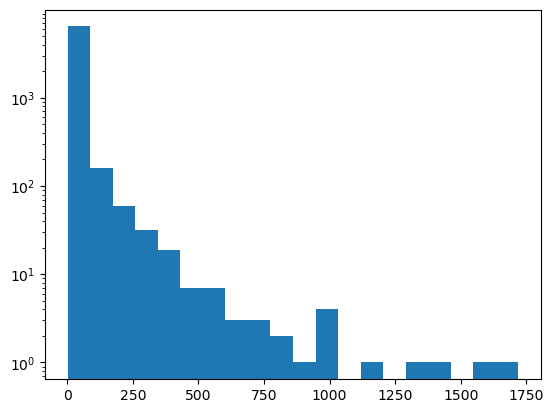

In [8]:

import matplotlib.pyplot as plt
from math import log

protein_to_doi = {prot: set() for prot in cancer_ralated_proteins}
for _, row in filtered_df.iterrows():
    protein = row['target_name']
    doi = row['doi']
    protein_to_doi[protein].add(doi)

count = {prot: len(dois) for prot, dois in protein_to_doi.items()}
# Make the histogram (log y)
hist = plt.hist(count.values(), bins=20)
plt.yscale('log')




So we that at some of the cancer-related protiens were studied hundreds of times!

xmin (start of power-law fit): 301.0
alpha (power-law exponent): 2.9205947066567424


Calculating best minimal value for power law fit
/home/miki/epfl/ada_project/.conda/lib/python3.12/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


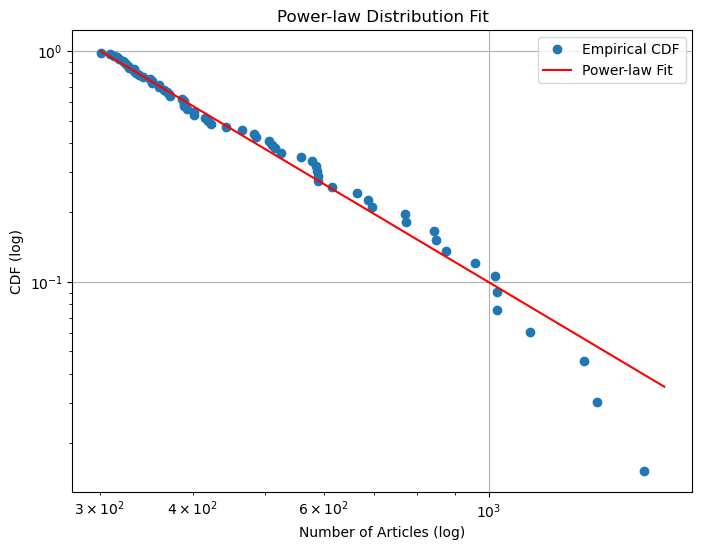

In [9]:
data = [i for i in sorted(count.values(), reverse=True) if i>300]
import powerlaw


# Fit the data to a power-law distribution
fit = powerlaw.Fit(data)

# Extract the x_min and alpha (power-law parameters)
xmin = fit.xmin
alpha = fit.alpha
print(f"xmin (start of power-law fit): {xmin}")
print(f"alpha (power-law exponent): {alpha}")

# Generate CDF for visualization
sorted_data = np.sort(data)
cdf = 1.0 - np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Plot the empirical CDF
plt.figure(figsize=(8, 6))
plt.loglog(sorted_data, cdf, marker='o', linestyle='none', label='Empirical CDF')

# Plot the theoretical power-law fit
powerlaw_line = (sorted_data[sorted_data >= xmin] / xmin) ** (1 - alpha)
plt.loglog(sorted_data[sorted_data >= xmin], powerlaw_line, linestyle='-', color='red', label='Power-law Fit')

# Add labels and legend
plt.xlabel('Number of Articles (log)')
plt.ylabel('CDF (log)')
plt.title('Power-law Distribution Fit')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
MIN_ARTICLES = 500
well_studied_proteins = {prot: protein_to_doi[prot] for prot, count in count.items() if count >= MIN_ARTICLES}
print(f"Number of well-studied proteins: {len(well_studied_proteins)}")
print("Well-studied proteins:")
for k in well_studied_proteins.keys():
    print(f"\t{k}")

print(well_studied_proteins.keys())


Number of well-studied proteins: 28
Well-studied proteins:
	Cytochrome P450 3A4
	Epidermal growth factor receptor
	Proto-oncogene tyrosine-protein kinase Src
	Vascular endothelial growth factor receptor 2
	D(2) dopamine receptor
	5-hydroxytryptamine receptor 1A
	5-hydroxytryptamine receptor 2A
	Acetylcholinesterase
	Cholinesterase
	Carbonic anhydrase 1
	Carbonic anhydrase 2
	Sodium-dependent serotonin transporter
	Prothrombin
	Adenosine receptor A2a
	Histone deacetylase 1
	Delta-type opioid receptor
	Mu-type opioid receptor
	Kappa-type opioid receptor
	Cytochrome P450 2C9
	Adenosine receptor A1
	Potassium voltage-gated channel subfamily H member 2
	Cannabinoid receptor 1
	Cytochrome P450 1A2
	Cytochrome P450 2C19
	Cytochrome P450 2D6
	Sodium-dependent dopamine transporter
	Prostaglandin G/H synthase 1
	Prostaglandin G/H synthase 2
dict_keys(['Cytochrome P450 3A4', 'Epidermal growth factor receptor', 'Proto-oncogene tyrosine-protein kinase Src', 'Vascular endothelial growth factor recep

We see those are indeed distinct (not, for example, mutants of one another). How do the timelines look like?

Cytochrome P450 3A4 NA months: 0.26%
Epidermal growth factor receptor NA months: 0.00%
Proto-oncogene tyrosine-protein kinase Src NA months: 0.00%
Vascular endothelial growth factor receptor 2 NA months: 0.00%
D(2) dopamine receptor NA months: 0.00%
5-hydroxytryptamine receptor 1A NA months: 0.00%
5-hydroxytryptamine receptor 2A NA months: 0.00%
Acetylcholinesterase NA months: 0.00%
Cholinesterase NA months: 0.00%
Carbonic anhydrase 1 NA months: 0.00%
Carbonic anhydrase 2 NA months: 0.00%
Sodium-dependent serotonin transporter NA months: 0.00%
Prothrombin NA months: 0.00%
Adenosine receptor A2a NA months: 0.00%


/tmp/ipykernel_281661/3233094881.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_281661/3233094881.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_281661/3233094881.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_2

Histone deacetylase 1 NA months: 0.00%
Delta-type opioid receptor NA months: 0.00%
Mu-type opioid receptor NA months: 0.00%
Kappa-type opioid receptor NA months: 0.00%
Cytochrome P450 2C9 NA months: 0.00%
Adenosine receptor A1 NA months: 0.00%
Potassium voltage-gated channel subfamily H member 2 NA months: 0.00%
Cannabinoid receptor 1 NA months: 0.00%
Cytochrome P450 1A2 NA months: 0.00%
Cytochrome P450 2C19 NA months: 0.00%
Cytochrome P450 2D6 NA months: 0.00%
Sodium-dependent dopamine transporter NA months: 0.00%


/tmp/ipykernel_281661/3233094881.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_281661/3233094881.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_281661/3233094881.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)


Prostaglandin G/H synthase 1 NA months: 0.00%
Prostaglandin G/H synthase 2 NA months: 0.00%


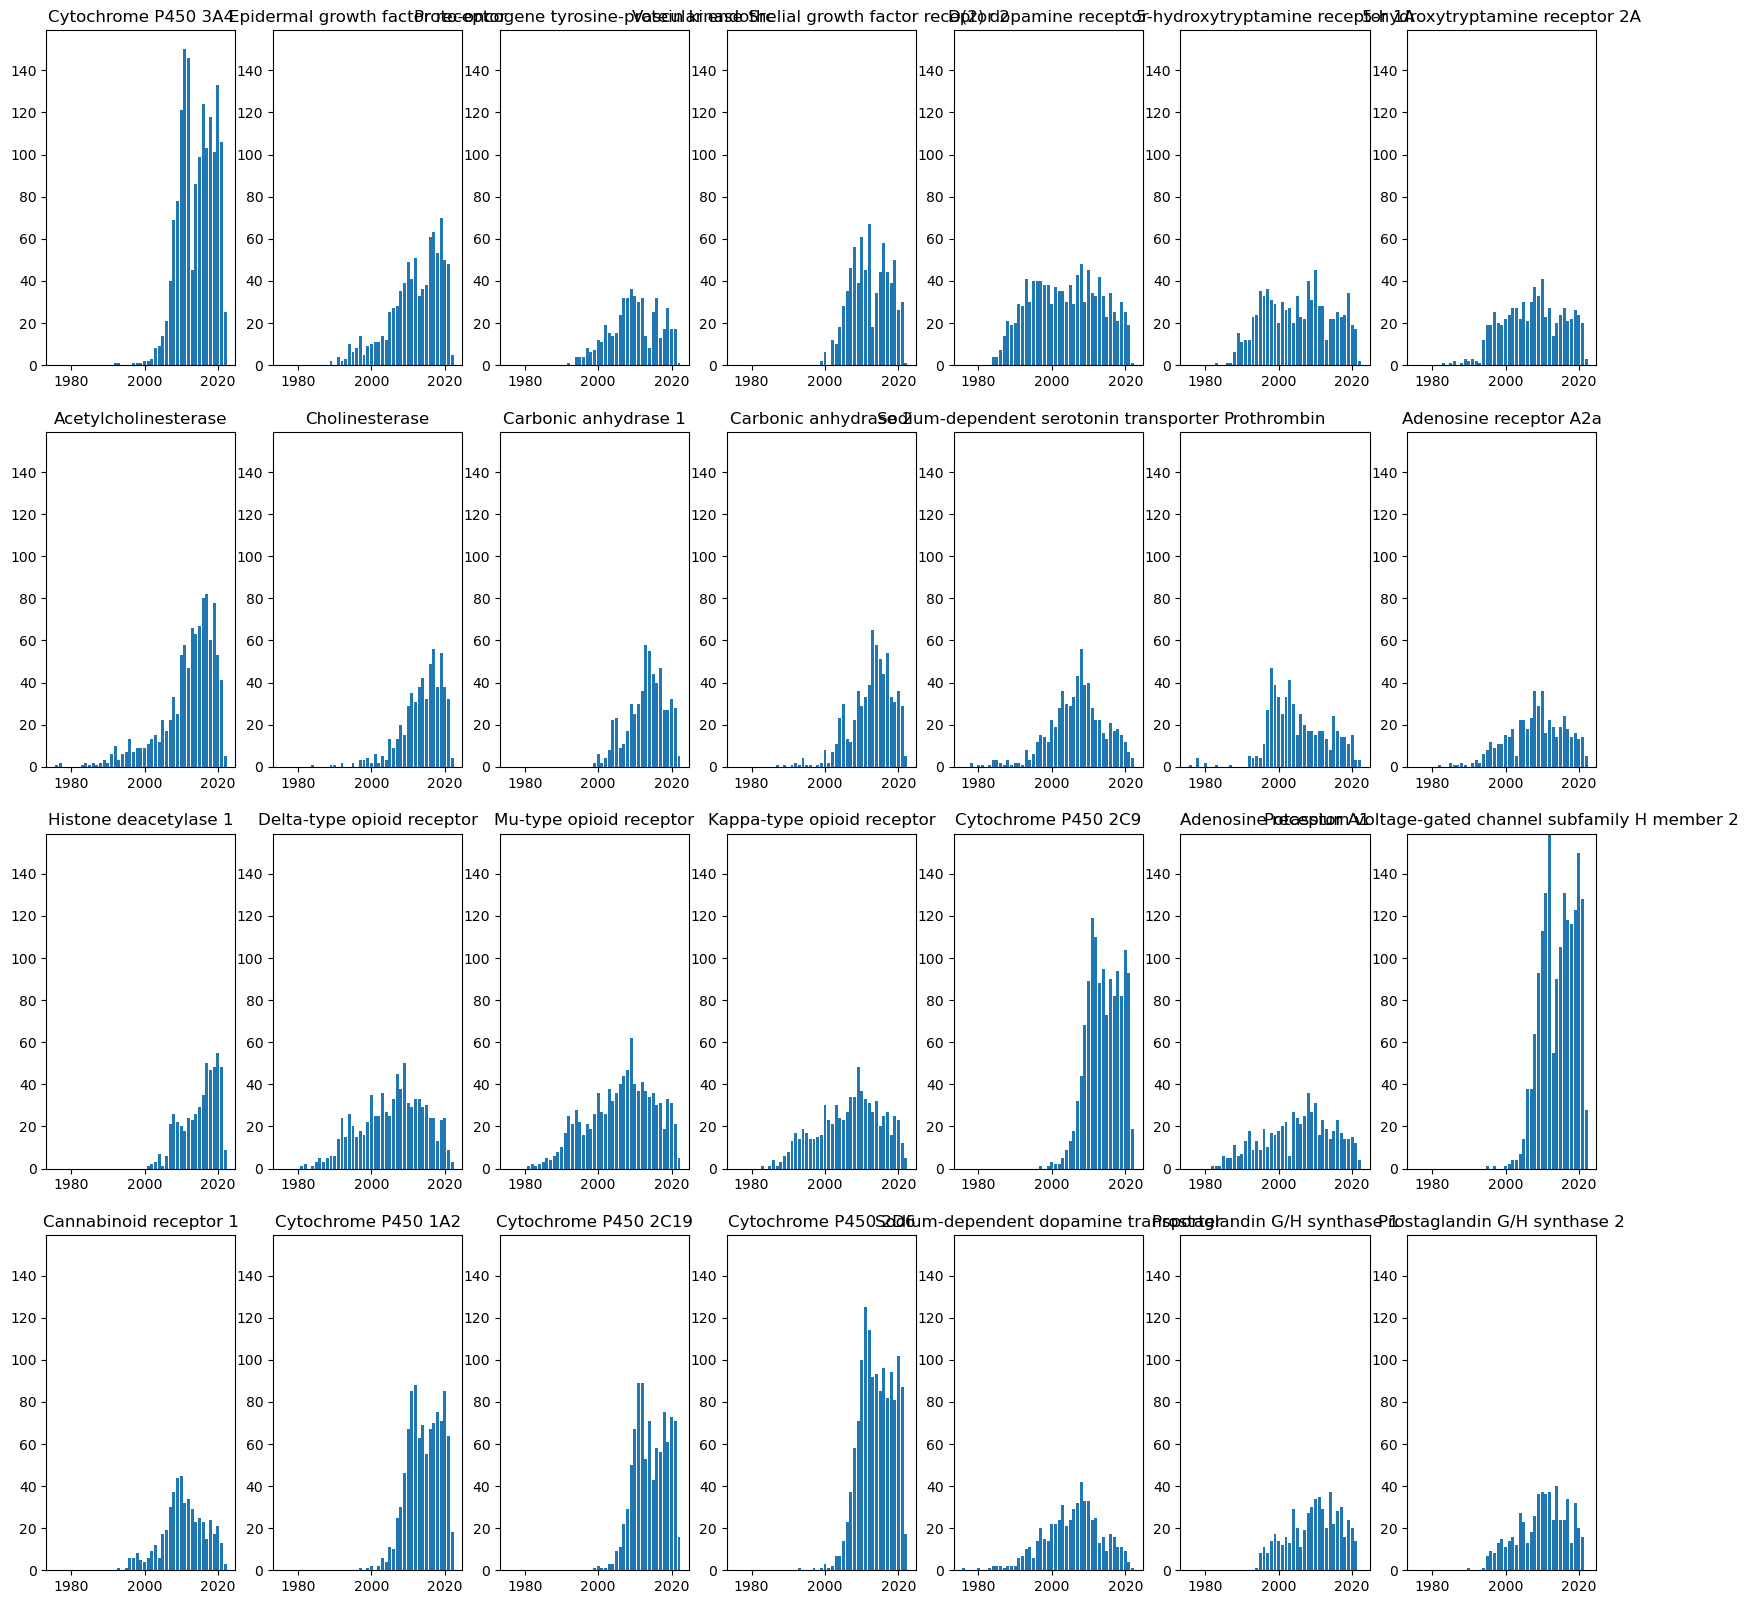

In [11]:
# Crate subplots
fig, axs = plt.subplots(4, 7, figsize=(20, 20))

well_studied_proteins_all_dois = set().union(*well_studied_proteins.values())
df_doi_related = df_doi[df_doi.index.isin(well_studied_proteins_all_dois)]
min_year = df_doi_related['year'].min()
max_year = df_doi_related['year'].max()

years = np.arange(min_year, max_year+1)

max_y = 0
# Flatten the axs array
for (wsp, dois), ax in zip(well_studied_proteins.items(), axs.flatten()):
    print(f"{wsp} NA months: {(df_doi_related['year'].isna()).mean()*100:.2f}%")
    df_doi_related = df_doi[df_doi.index.isin(dois)]


    df_doi_related.dropna(subset=['year', ], inplace=True)

    counts_some = df_doi_related.value_counts('year')
    counts_all = [counts_some[y] if y in counts_some.index else 0 for y in years]
    ax.bar(years, counts_all, label=wsp)

    ax.set_title(wsp)

    max_y = max(max_y, max(counts_all))
for ax in axs.flatten():
    ax.set_ylim(0, max_y)

    

Cytochrome P450 3A4 NA months: 0.26%
Epidermal growth factor receptor NA months: 0.00%
Proto-oncogene tyrosine-protein kinase Src NA months: 0.00%
Vascular endothelial growth factor receptor 2 NA months: 0.00%
D(2) dopamine receptor NA months: 0.00%
5-hydroxytryptamine receptor 1A NA months: 0.00%
5-hydroxytryptamine receptor 2A NA months: 0.00%
Acetylcholinesterase NA months: 0.00%
Cholinesterase NA months: 0.00%
Carbonic anhydrase 1 NA months: 0.00%
Carbonic anhydrase 2 NA months: 0.00%
Sodium-dependent serotonin transporter NA months: 0.00%


/tmp/ipykernel_281661/3316069151.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_281661/3316069151.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_281661/3316069151.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_2

Prothrombin NA months: 0.00%
Adenosine receptor A2a NA months: 0.00%
Histone deacetylase 1 NA months: 0.00%
Delta-type opioid receptor NA months: 0.00%
Mu-type opioid receptor NA months: 0.00%
Kappa-type opioid receptor NA months: 0.00%
Cytochrome P450 2C9 NA months: 0.00%
Adenosine receptor A1 NA months: 0.00%
Potassium voltage-gated channel subfamily H member 2 NA months: 0.00%
Cannabinoid receptor 1 NA months: 0.00%
Cytochrome P450 1A2 NA months: 0.00%
Cytochrome P450 2C19 NA months: 0.00%
Cytochrome P450 2D6 NA months: 0.00%


/tmp/ipykernel_281661/3316069151.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_281661/3316069151.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_281661/3316069151.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_2

Sodium-dependent dopamine transporter NA months: 0.00%
Prostaglandin G/H synthase 1 NA months: 0.00%
Prostaglandin G/H synthase 2 NA months: 0.00%


/tmp/ipykernel_281661/3316069151.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_281661/3316069151.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_281661/3316069151.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_2

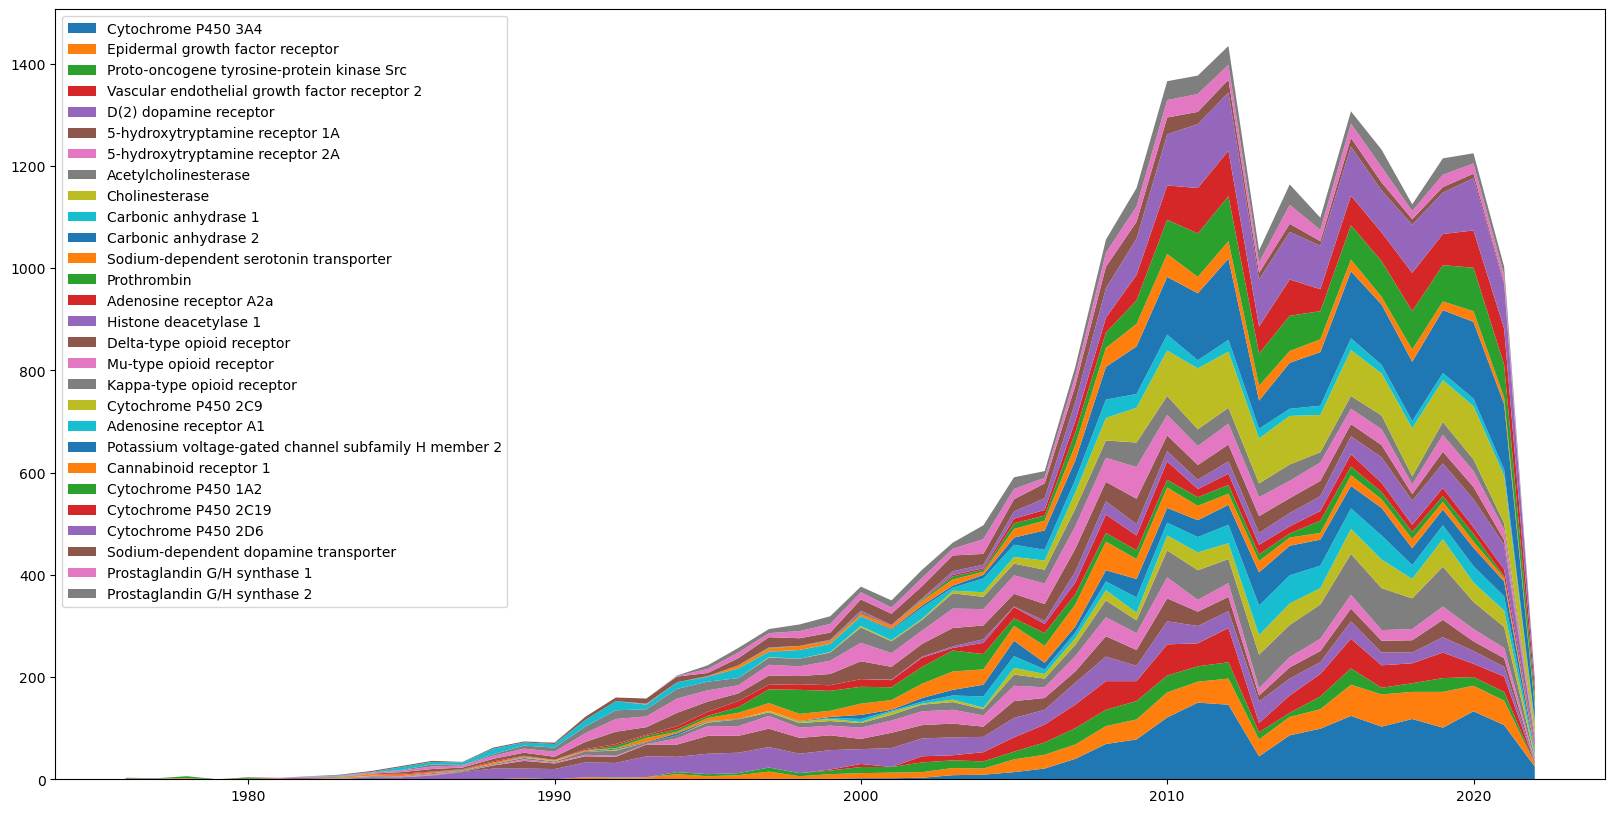

In [16]:
# Crate subplots

well_studied_proteins_all_dois = set().union(*well_studied_proteins.values())
df_doi_related = df_doi[df_doi.index.isin(well_studied_proteins_all_dois)]
min_year = df_doi_related['year'].min()
max_year = df_doi_related['year'].max()

years = np.arange(min_year, max_year+1)
plt.figure(figsize=(20, 10))
max_y = 0
# Flatten the axs array
all_counts_array = []
for (wsp, dois), ax in zip(well_studied_proteins.items(), axs.flatten()):
    print(f"{wsp} NA months: {(df_doi_related['year'].isna()).mean()*100:.2f}%")
    df_doi_related = df_doi[df_doi.index.isin(dois)]


    df_doi_related.dropna(subset=['year', ], inplace=True)

    counts_some = df_doi_related.value_counts('year')
    counts_all = [counts_some[y] if y in counts_some.index else 0 for y in years]
    all_counts_array.append(counts_all)

    ax.bar(years, counts_all, label=wsp)

    ax.set_title(wsp)

    max_y = max(max_y, max(counts_all))
for ax in axs.flatten():
    ax.set_ylim(0, max_y)

plt.stackplot(years, all_counts_array, labels=well_studied_proteins.keys())
plt.legend()
    

This dose not consider the number of Ligands in a single article (the number of measurements).

# Perhpas we can manually check if these proteins are cancer related or not!

In [ ]:
df_doi.head()

In [ ]:

df_doi.dropna(subset=['year']).value_counts('year').sort_index().plot(kind='bar') 

## Cancer related

In [ ]:
cancer_keywords= [
    # General Cancer Terms
    "Cancer", "Tumor", "Carcinoma", "Sarcoma", "Malignancy", "Neoplasm", 
    "Metastasis", "Oncogene", "Antineoplastic", "Chemotherapy", 
    "Radiotherapy", "Immunotherapy", "Targeted therapy", "Cytotoxic", "Cancerous"
    
    # Types of Cancer - Common Solid Tumors
    "Breast cancer", "Lung cancer", "Colorectal cancer", "Pancreatic cancer", 
    "Prostate cancer", "Melanoma", "Ovarian cancer", "Brain tumor", 
    "Liver cancer", "Gastric cancer", "Esophageal cancer", "Kidney cancer",
    
    # Types of Cancer - Hematological Malignancies
    "Leukemia", "Lymphoma", "Myeloma", "Hodgkin's lymphoma", 
    "Non-Hodgkin's lymphoma", "Chronic lymphocytic leukemia (CLL)", 
    "Acute myeloid leukemia (AML)",
    
    # Molecular Targets and Mechanisms - Proteins
    "Tyrosine kinase", "EGFR", "HER2", "VEGF", "PD-1", "PD-L1", 
    "CTLA-4", "BCL-2",
    
    # Molecular Targets and Mechanisms - Genes and Pathways
    "KRAS", "TP53", "BRCA1", "BRCA2", "MYC", "PI3K", "RAS/RAF/MEK/ERK pathway", 
    "JAK/STAT pathway", "Wnt signaling", "Hedgehog pathway",
    
    # Molecular Targets and Mechanisms - Drug Mechanisms
    "Apoptosis inducer", "Angiogenesis inhibitor", "DNA alkylation", 
    "DNA intercalation", "Topoisomerase inhibitor", "Microtubule stabilizer", 
    "Immune checkpoint inhibitor",
    
    # Specific Drug Classes
    "Alkylating agents", "Antimetabolites", "Anthracyclines", "Taxanes", 
    "Platinum compounds", "Monoclonal antibodies", "PARP inhibitors", 
    "CDK inhibitors", "HDAC inhibitors", "Proteasome inhibitors", 
    "mTOR inhibitors",
    
    # Treatment-Related Terms
    "Cytotoxicity", "Resistance", "Hormone therapy", "Anti-angiogenic", 
    "Cell cycle arrest", "Radiosensitizer", "Synergistic therapy",
    
    # Emerging Terms
    "Precision oncology", "Epigenetic modulation", 
    "Adoptive cell therapy", "CAR-T cell therapy", "Tumor microenvironment", 
    "Cancer stem cells"
]

import re

# Create a single regex pattern from the list of terms (case-insensitive)
pattern = '|'.join(rf"\b{re.escape(term)}\b" for term in cancer_keywords)

# Filter rows where "specific-description" contains any of the cancer terms
filtered_df = df_bindingdb[df_bindingdb['target_name'].str.contains(pattern, case=False, na=False)]
filtered_df.head()

In [ ]:
len(filtered_df), len(df_bindingdb)

In [ ]:
cancer_ralated_proteins = filtered_df['target_name'].unique()
len(cancer_ralated_proteins)

In [ ]:

import matplotlib.pyplot as plt
from math import log

protein_to_doi = {prot: set() for prot in cancer_ralated_proteins}
for _, row in filtered_df.iterrows():
    protein = row['target_name']
    doi = row['doi']
    protein_to_doi[protein].add(doi)

count = {prot: len(dois) for prot, dois in protein_to_doi.items()}
# Make the histogram (log y)
hist = plt.hist(count.values(), bins=20)
plt.yscale('log')




So we that at some of the cancer-related protiens were studied hundreds of times!

In [ ]:
MIN_ARTICLES = 35
well_studied_proteins = {prot: protein_to_doi[prot] for prot, count in count.items() if count >= MIN_ARTICLES}
print(f"Number of well-studied proteins: {len(well_studied_proteins)}")
print("Well-studied proteins:")

for k in well_studied_proteins.keys():
    print(f"\t{k}")


We see those are indeed distinct (not, for example, mutants of one another). How do the timelines look like?

In [ ]:
# Crate subplots
fig, axs = plt.subplots(3,4, figsize=(20, 20))

well_studied_proteins_all_dois = set().union(*well_studied_proteins.values())
df_doi_related = df_doi[df_doi.index.isin(well_studied_proteins_all_dois)]
min_year = df_doi_related['year'].min()
max_year = df_doi_related['year'].max()

years = np.arange(min_year, max_year+1)

max_y = 0
# Flatten the axs array
for (wsp, dois), ax in zip(well_studied_proteins.items(), axs.flatten()):
    print(f"{wsp} NA months: {(df_doi_related['year'].isna()).mean()*100:.2f}%")
    df_doi_related = df_doi[df_doi.index.isin(dois)]


    df_doi_related.dropna(subset=['year', ], inplace=True)

    counts_some = df_doi_related.value_counts('year')
    counts_all = [counts_some[y] if y in counts_some.index else 0 for y in years]
    ax.bar(years, counts_all, label=wsp)

    ax.set_title(wsp)

    max_y = max(max_y, max(counts_all))
for ax in axs.flatten():
    ax.set_ylim(0, max_y)

    

This dose not consider the number of Ligands in a single article (the number of measurements).

In [ ]:
df_doi.head()

In [ ]:

df_doi.dropna(subset=['year']).value_counts('year').sort_index().plot(kind='bar') 

## 1.

In [ ]:
df_merged = pd.read_pickle(MERGED)
df_merged.head()

In [ ]:
df_merged.columns

## TODO
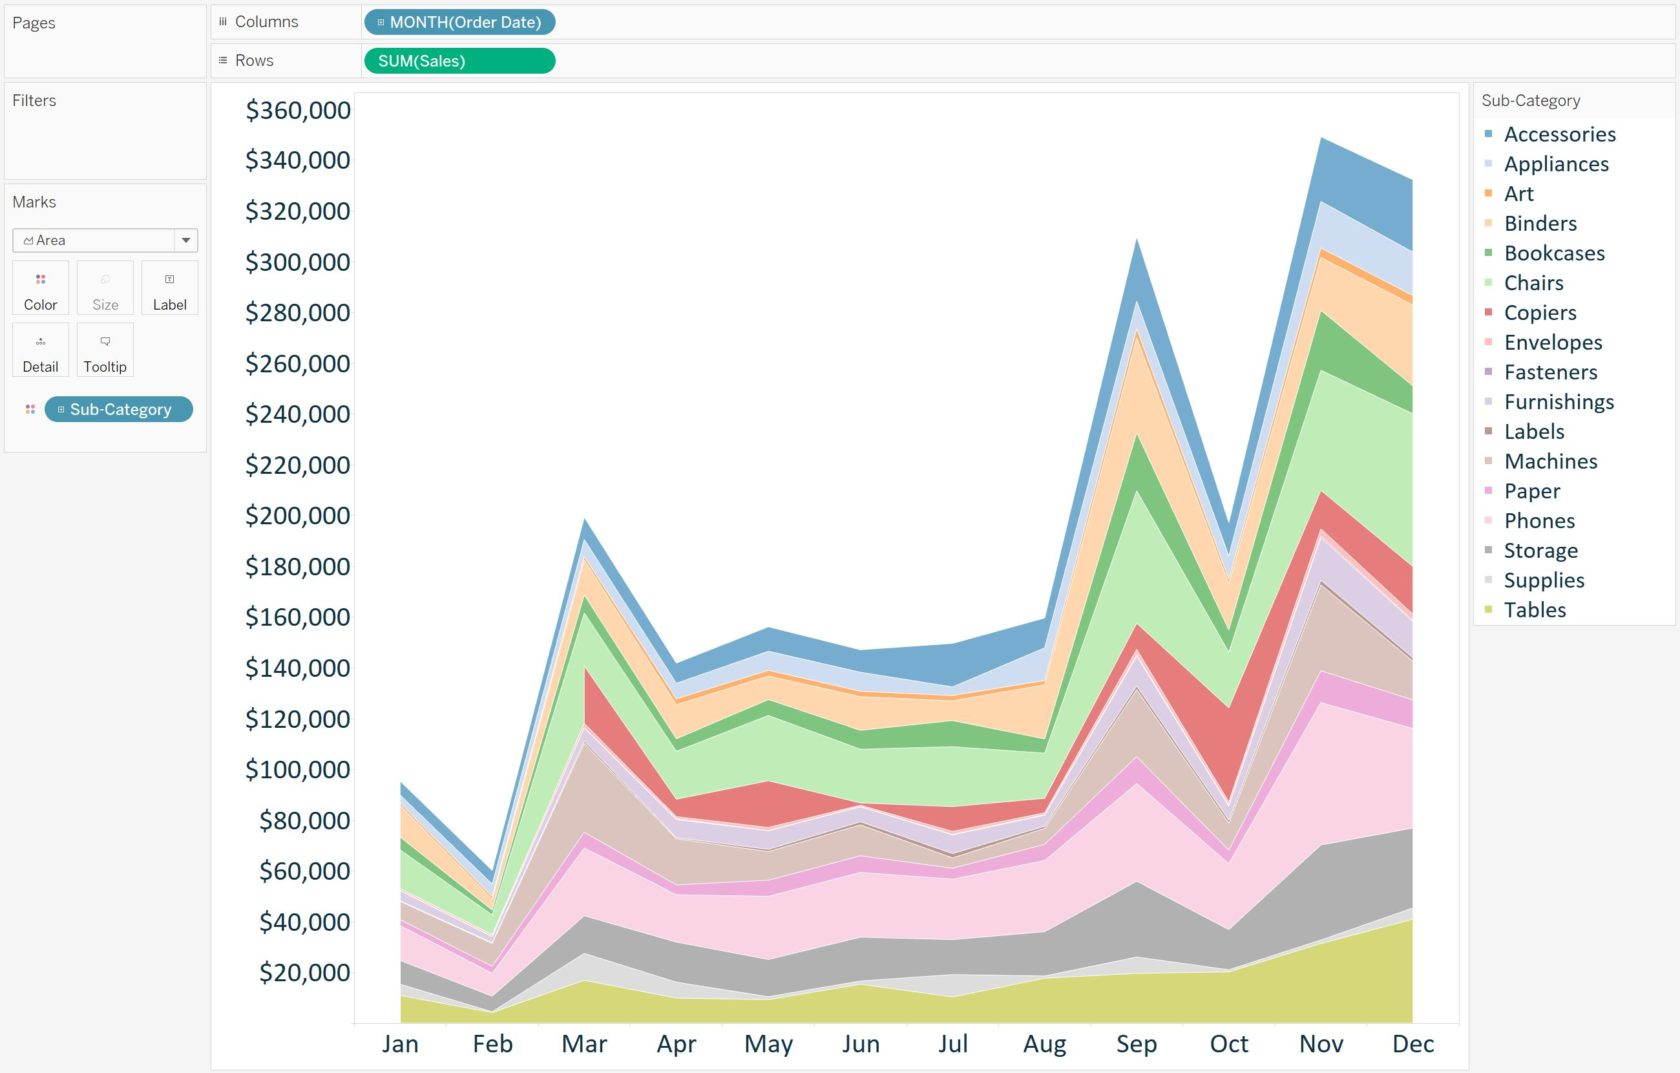

## How has the number of ligands evolved over time?